In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import pydotplus
import graphviz
from IPython.display import Image
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("films.csv")

In [3]:
df

,gender,is_28+,employment_status,watching
0,M,0,student,yes
1,M,1,working,yes
2,F,0,working,yes
3,F,0,student,no
4,M,1,working,yes
5,M,1,working,yes
6,F,0,working,yes
7,M,0,student,no
8,F,1,working,no
9,M,0,working,no


In [4]:
df["watching"].value_counts()

yes    26
no     24
Name: watching, dtype: int64

In [5]:
df["gender"].value_counts()

M    28
F    22
Name: gender, dtype: int64

In [7]:
pd.crosstab(

    index= df["gender"],
    columns= df["watching"]

)

watching,no,yes
gender,,
F,8,14
M,16,12


In [8]:
df1

NameError: name 'df1' is not defined

In [9]:
print(df1.F,df1.M)

NameError: name 'df1' is not defined

In [10]:
Pmw= 12/28
Pfw= 14/22
Pmw,Pfw

(0.42857142857142855, 0.6363636363636364)

In [11]:
GImw = 2*Pmw*(1-Pmw)
GIfw = 2*Pfw*(1-Pfw)
print(GImw,GIfw)

0.48979591836734687 0.4628099173553719


In [12]:
WG1=((28/50)*GImw) + ((22/50)*GIfw)
WG1

0.47792207792207797

In [13]:
pd.crosstab(

    index= df["employment_status"],
    columns= df["watching"]

)

watching,no,yes
employment_status,,
student,5,4
working,19,22


In [14]:
Psw= 4/9
Pww= 22/41

GIsw = 2*Psw*(1-Psw)
GIww = 2*Pww*(1-Pww)

WG2=((9/50)*GIsw)+((41/50)*GIww)
WG2

0.4966937669376693

In [15]:
pd.crosstab(

    index= df["is_28+"],
    columns= df["watching"]

)

watching,no,yes
is_28+,,
0,11,17
1,13,9


In [16]:
Pow= 17/28
Pyw= 9/22

GIow = 2*Pow*(1-Pow)
GIyw = 2*Pyw*(1-Pyw)

WG3= ((28/50)*GIow) + ((22/50)*GIyw)
WG3

0.4798701298701299

In [17]:
E1 = -Pmw*(np.log2(Pmw)) -(1-Pmw)*(np.log2(1-Pmw))
E2 = -Pfw*(np.log2(Pfw)) -(1-Pfw)*(np.log2(1-Pfw))
WE1=((28/50)*E1) + ((22/50)*E2)
WE1

0.9678182902034626

In [18]:
E1 = -Psw*(np.log2(Psw)) -(1-Psw)*(np.log2(1-Psw))
E2 = -Pww*(np.log2(Pww)) -(1-Pww)*(np.log2(1-Pww))
WE2=((9/50)*E1) + ((41/50)*E2)
WE2

0.9952239672487353

In [19]:
E1 = -Pow*(np.log2(Pow)) -(1-Pow)*(np.log2(1-Pow))
E2 = -Pyw*(np.log2(Pyw)) -(1-Pyw)*(np.log2(1-Pyw))
WE3=((28/50)*E1) + ((22/50)*E2)
WE3

0.9707555194510482

In [20]:
Pw= 26/50
Pn= 24/50
E1 = -Pw*(np.log2(Pw)) -(1-Pw)*(np.log2(1-Pw))
E2 = -Pn*(np.log2(Pn)) -(1-Pn)*(np.log2(1-Pn))
WE4=((26/50)*E1) + ((24/50)*E2)
WE4

0.9988455359952018

In [21]:
WE4-WE1,WE4-WE2,WE4-WE3

(0.03102724579173921, 0.0036215687464664637, 0.02809001654415355)

In [22]:
df1=df.iloc[:,0:3]
df1

,gender,is_28+,employment_status
0,M,0,student
1,M,1,working
2,F,0,working
3,F,0,student
4,M,1,working
5,M,1,working
6,F,0,working
7,M,0,student
8,F,1,working
9,M,0,working


In [53]:
Xtrain,Xtest,Ytrain,Ytest =train_test_split(df1,df["watching"], test_size=0.2, random_state=12)

In [54]:
dtc=DecisionTreeClassifier()

In [55]:
le = LabelEncoder()

In [56]:
df2=le.fit_transform(df1["gender"])

In [57]:
df3=le.fit_transform(df1["employment_status"])
df4=le.fit_transform(df["watching"])

In [58]:
df1["gender"]=df2
df1["employment_status"]=df3

In [59]:
df1,df4

(    gender  is_28+  employment_status
 0        1       0                  0
 1        1       1                  1
 2        0       0                  1
 3        0       0                  0
 4        1       1                  1
 5        1       1                  1
 6        0       0                  1
 7        1       0                  0
 8        0       1                  1
 9        1       0                  1
 10       1       1                  1
 11       1       1                  1
 12       1       1                  1
 13       0       1                  1
 14       0       0                  0
 15       1       1                  1
 16       0       0                  1
 17       1       0                  1
 18       0       1                  1
 19       1       0                  1
 20       1       1                  1
 21       0       0                  1
 22       1       1                  1
 23       0       0                  1
 24       0       1      

In [60]:
Xtrain,Xtest,Ytrain,Ytest =train_test_split(df1,df4, test_size=0.2, random_state=12)

In [61]:
dtc.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [62]:
dtc.predict(Xtest),Ytest

(array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0]), array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0]))

In [63]:
accuracy_score(dtc.predict(Xtest),Ytest)

0.7

In [34]:
Xtrain,Xtest,Ytrain,Ytest =train_test_split(df1,df4, test_size=0.35, random_state=12)
dtc.fit(Xtrain,Ytrain)
accuracy_score(dtc.predict(Xtest),Ytest)

0.4444444444444444

In [35]:
Xtrain,Xtest,Ytrain,Ytest =train_test_split(df1,df4, test_size=0.3, random_state=12)
dtc.fit(Xtrain,Ytrain)
accuracy_score(dtc.predict(Xtest),Ytest)

0.4666666666666667

In [36]:
tree.export_graphviz(
    dtc, 
    out_file="tree.dot",
    filled=True,
    rounded=True,
    special_characters=True
    )
graph= pydotplus.graph_from_dot_file("tree.dot")

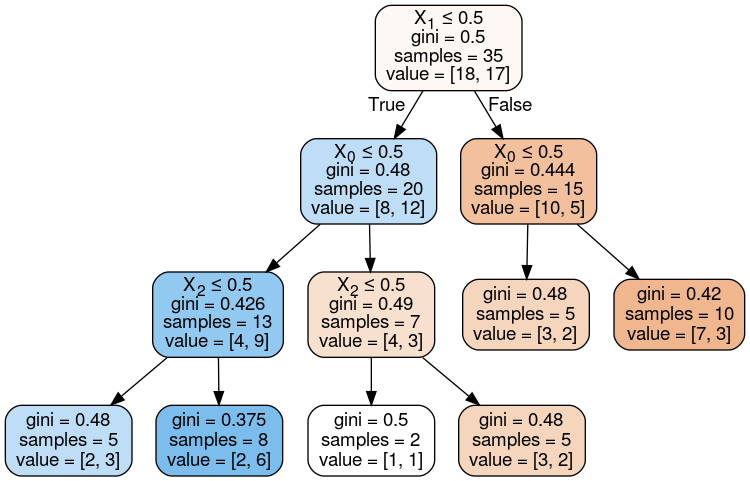

In [37]:
Image(graph.create_png())

In [38]:
Xtrain,Xtest,Ytrain,Ytest =train_test_split(df1,df4, test_size=0.25, random_state=12)
dtc.fit(Xtrain,Ytrain)
accuracy_score(dtc.predict(Xtest),Ytest)

0.46153846153846156

In [39]:
Xtrain,Xtest,Ytrain,Ytest =train_test_split(df1,df4, test_size=0.40, random_state=12)
dtc.fit(Xtrain,Ytrain)
accuracy_score(dtc.predict(Xtest),Ytest)

0.5

In [40]:
Xtrain,Xtest,Ytrain,Ytest =train_test_split(df1,df4, test_size=0.45, random_state=12)
dtc.fit(Xtrain,Ytrain)
accuracy_score(dtc.predict(Xtest),Ytest)

0.5652173913043478

In [41]:
Xtrain,Xtest,Ytrain,Ytest =train_test_split(df1,df4, test_size=0.50, random_state=12)
dtc.fit(Xtrain,Ytrain)
accuracy_score(dtc.predict(Xtest),Ytest)

0.52

In [42]:
Xtrain,Xtest,Ytrain,Ytest =train_test_split(df1,df4, test_size=0.55, random_state=12)
dtc.fit(Xtrain,Ytrain)
accuracy_score(dtc.predict(Xtest),Ytest)

0.5

In [43]:
Xtrain,Xtest,Ytrain,Ytest =train_test_split(df1,df4, test_size=0.60, random_state=12)
dtc.fit(Xtrain,Ytrain)
accuracy_score(dtc.predict(Xtest),Ytest)

0.4666666666666667

In [44]:
Xtrain,Xtest,Ytrain,Ytest =train_test_split(df1,df4, test_size=0.65, random_state=12)
dtc.fit(Xtrain,Ytrain)
accuracy_score(dtc.predict(Xtest),Ytest)

0.3939393939393939

In [45]:
Xtrain,Xtest,Ytrain,Ytest =train_test_split(df1,df4, test_size=0.70, random_state=12)
dtc.fit(Xtrain,Ytrain)
accuracy_score(dtc.predict(Xtest),Ytest)

0.45714285714285713

In [46]:
Xtrain,Xtest,Ytrain,Ytest =train_test_split(df1,df4, test_size=0.75, random_state=12)
dtc.fit(Xtrain,Ytrain)
accuracy_score(dtc.predict(Xtest),Ytest)

0.47368421052631576

In [47]:
Xtrain,Xtest,Ytrain,Ytest =train_test_split(df1,df4, test_size=0.80, random_state=12)
dtc.fit(Xtrain,Ytrain)
accuracy_score(dtc.predict(Xtest),Ytest)

0.5

In [48]:
Xtrain,Xtest,Ytrain,Ytest =train_test_split(df1,df4, test_size=0.85, random_state=12)
dtc.fit(Xtrain,Ytrain)
accuracy_score(dtc.predict(Xtest),Ytest)

0.5116279069767442

In [49]:
Xtrain,Xtest,Ytrain,Ytest =train_test_split(df1,df4, test_size=0.90, random_state=12)
dtc.fit(Xtrain,Ytrain)
accuracy_score(dtc.predict(Xtest),Ytest)

0.5777777777777777

In [50]:
Xtrain,Xtest,Ytrain,Ytest =train_test_split(df1,df4, test_size=0.95, random_state=12)
dtc.fit(Xtrain,Ytrain)
accuracy_score(dtc.predict(Xtest),Ytest)

0.5833333333333334

In [51]:
Xtrain,Xtest,Ytrain,Ytest =train_test_split(df1,df4, test_size=1, random_state=12)
dtc.fit(Xtrain,Ytrain)
accuracy_score(dtc.predict(Xtest),Ytest)

0.0

In [83]:
print(confusion_matrix(Ytest,dtc.predict(Xtest)))

[[4 1]
 [2 3]]


In [78]:
print(classification_report(Ytest,dtc.predict(Xtest)))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.75      0.60      0.67         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



In [87]:
3/4

0.75